# Task 2 - Eigenfaces: Facial Feature Extraction and Representation (Using a Subset of Olivetti Dataset) (27 Points)

**Context:** Principal Component Analysis (PCA) is a dimensionality reduction method that is often used to reduce the dimensionality of datasets, by transforming a large set of variables into a smaller one, while preserving as much variance as possible. There are two methods for performing a Principal Component Analysis: using Eigenvector Decomposition (EIG) and the more generalized Singular Value Decomposition (SVD). The Eigenfaces technique applies PCA to face images to extract key features (eigenfaces) for tasks like facial feature extraction and representation.

**Input:** In this exercise, you will use a specific subset of 5 subjects from the Olivetti Faces dataset (Subject IDs: 1, 10, 29, 33, 38). The images will be preprocessed (flattened) to serve as input for PCA and NMF.

**Objective:** Implement PCA from scratch (Eigenfaces) on this subset, compare with Scikit-learn's PCA, explain the curse of dimensionality, and apply Non-Negative Matrix Factorization (NMF) to this face data subset. **Please use `random_state=42` where applicable for reproducibility.**

In [1]:
# TODO: uncomment and import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import silhouette_score # Optional: if you want to measure separation
# import time

# Please use random_state=42 for all operations involving randomness to ensure reproducibility.

## Data Loading and Preprocessing for Selected Subjects

Load the Olivetti Faces dataset and filter it to include only subjects with IDs (1, 10, 29, 33, 38). The images are then flattened. Remember to use `random_state=42` when fetching the data if shuffle is True.

Shape of the dataset:
(400, 4096) (400,)
First 10 samples of X_all_subjects: [[0.1983471  0.23553719 0.35123968 ... 0.06198347 0.12809917 0.09090909]
 [0.18595041 0.12809917 0.11570248 ... 0.19008264 0.2107438  0.2107438 ]
 [0.5082645  0.60330576 0.6198347  ... 0.33471075 0.3429752  0.3429752 ]
 ...
 [0.24793388 0.34710744 0.46694216 ... 0.11157025 0.12396694 0.11983471]
 [0.33471075 0.38842976 0.49173555 ... 0.1446281  0.16115703 0.18595041]
 [0.28512397 0.28512397 0.27272728 ... 0.30165288 0.30991736 0.3140496 ]]

First 10 samples of y_all_subjects: [20 28  3 21  9  8 32  9 26 12]

Using fixed subject IDs for the assignment: (1, 10, 29, 33, 38)
Number of samples after filtering: 50

Original (first 10 labels): [38  1 10 38 38 33 29 10 38  1]
Remapped (first 10 labels): [4 0 1 4 4 3 2 1 4 0]


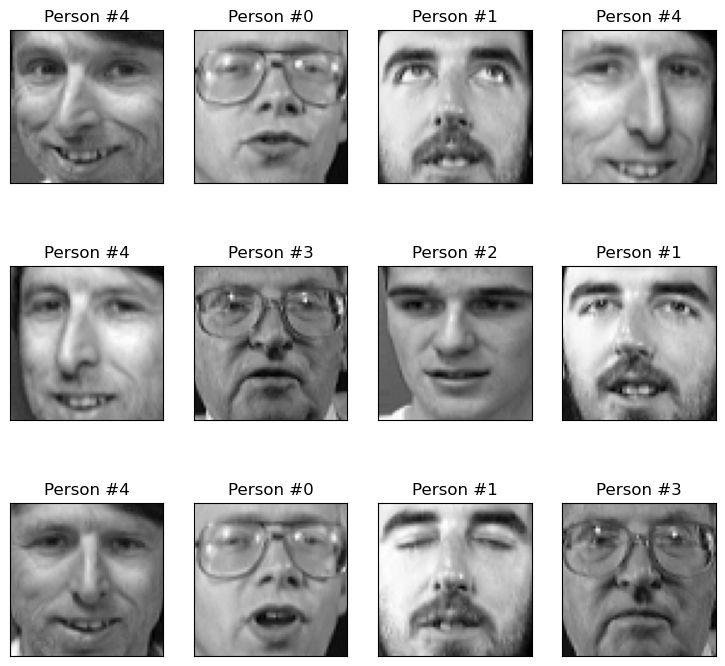

In [2]:
# TODO: Load Olivetti faces dataset and filter for specific subjects
faces = fetch_olivetti_faces(shuffle=True, random_state=42) # https://vtudeveloper.in/6th-sem-ml-lab-program9.php
X_all_subjects = faces.data
y_all_subjects = faces.target
# Check the shape of the dataset
print("Shape of the dataset:")
print(X_all_subjects.shape, y_all_subjects.shape)
print (f"First 10 samples of X_all_subjects: {X_all_subjects[:10]}\n")
print(f"First 10 samples of y_all_subjects: {y_all_subjects[:10]}\n")

fixed_subject_ids = (1, 10, 29, 33, 38)
print(f"Using fixed subject IDs for the assignment: {fixed_subject_ids}")

# TODO: Filter X_all_subjects and y_all_subjects for fixed_subject_ids to get X and y
# https://medium.com/%40heyamit10/understanding-numpy-isin-0cad62d9f004 (isin method used to filter arrays)
# https://numpy.org/doc/stable/reference/generated/numpy.isin.html (isin documentation)
mask = np.isin(y_all_subjects, fixed_subject_ids)
print(f"Number of samples after filtering: {np.sum(mask)}\n")
X = X_all_subjects[mask]
y_original_labels = y_all_subjects[mask]

# TODO: Remap y_original_labels to 0-(n_classes-1) for y
# Using LabelEncoder to remap labels (https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)
le = LabelEncoder()
y = le.fit_transform(y_original_labels)
print(f"Original (first 10 labels): {y_original_labels[:10]}")
print(f"Remapped (first 10 labels): {y[:10]}")

# TODO: Plot a sample gallery of the selected subjects
# https://github.com/Manaliagarwal/Eigen-Faces-fetch_olivetti_faces-/blob/main/EigneFaces.ipynb (plot_gallery function)
def plot_gallery(images, h, w, titles, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

n_samples, height, width = faces.images.shape
titles = [f"Person #{label}" for label in y[:12]]
plot_gallery(X[:12], height, width, titles)

## 2.1 Eigenfaces Implementation (Adapted from PCA)

Apply PCA to the selected 5-subject subset. Use `random_state=42` in sklearn's PCA.

### 2.1.1 Implement Eigenfaces from scratch (via SVD). Visualize the top eigenfaces and project the dataset onto the first two principal components. (10 points)

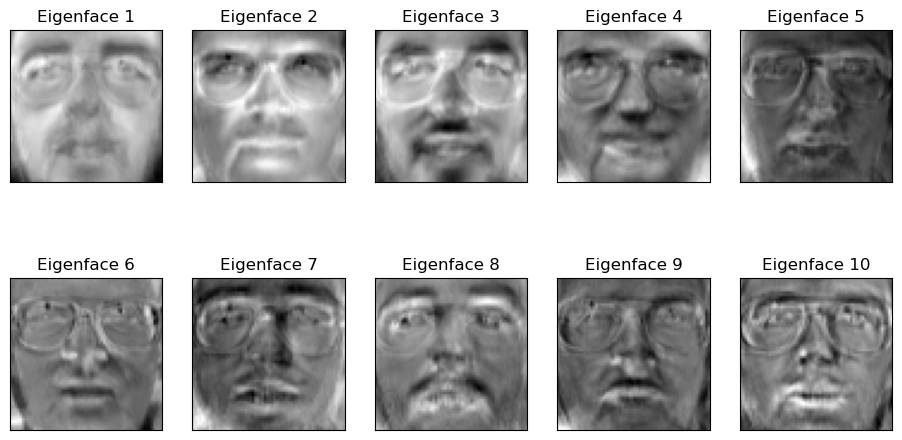

In [3]:
# TODO: Implement PCA from scratch on the 5-subject subset (X, y)
# 1. Calculate the mean face
mean_face = np.mean(X, axis=0) # https://github.com/Manaliagarwal/Eigen-Faces-fetch_olivetti_faces-/blob/main/EigneFaces.ipynb (mean_image variable)

# 2. Center the data
# https://github.com/navydhara79/Face-Recognition-using-eigen-faces/blob/main/face_recognition.ipynb (Normalization step)
X_centered = X - mean_face  # Centering the data by subtracting the mean face

# 3. Perform SVD
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)  # SVD decomposition (https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
eigenfaces_scratch = Vt

# 4. Visualize the top eigenfaces (use plot_gallery)
'''
The first 10 eigenfaces are visualized using the plot_gallery function from above.
'''
titles = [f"Eigenface {i+1}" for i in range(10)]
plot_gallery(eigenfaces_scratch[:10], height, width, titles, n_row=2, n_col=5)

# 5. Project the centered data onto the first two principal components
'''
https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb
Section: Projecting Down to d Dimensions
'''
X_pca_scratch = X_centered @ Vt[:2].T


### 2.1.2 Compare your results with the PCA algorithm of sklearn. (6 points)
- Run sklearn's PCA on the 5-subject face subset. Project the data onto the first two principal components. Use `random_state=42`.
- Create scatter plots for the results (your implementation and sklearn's). Colour the points by their corresponding subject ID (target).

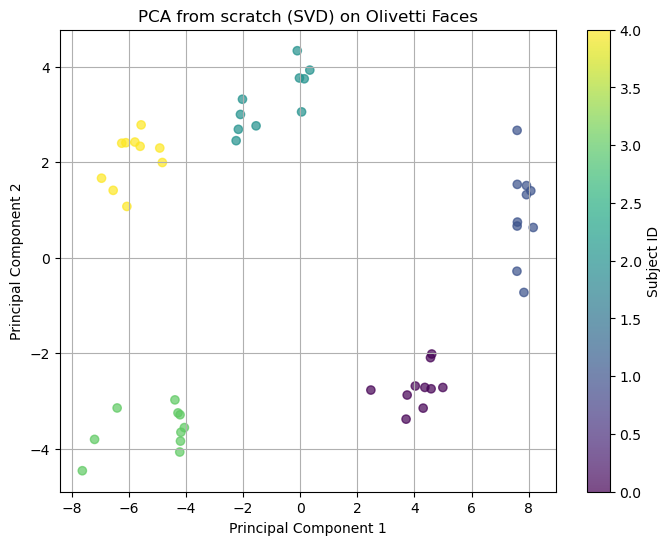

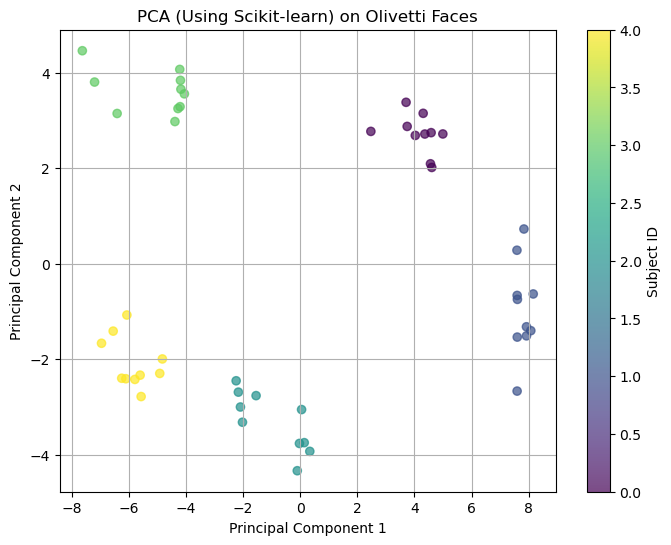

In [4]:
# TODO: Fit PCA using sklearn on the 5-subject subset (X,y)

# Project to 2D for plotting using sklearn PCA
'''
https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb
Section: Using Scikit-Learn

Also refer to the PCA documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
'''
pca = PCA(n_components=2, random_state=42)
X2D = pca.fit_transform(X)

# TODO: Create scatter plots for comparison
# https://medium.com/@sahin.samia/principal-component-analysis-pca-made-easy-a-complete-hands-on-guide-e26a3680c0bc
# Scatter plot from 'Implementing PCA Using NumPy and SciPy scratch' and 'PCA using SKlearn'
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_scratch[:, 0], X_pca_scratch[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA from scratch (SVD) on Olivetti Faces")
plt.colorbar(label="Subject ID")
plt.grid()
plt.show()

# Scatter plot for sklearn PCA
# Plot PCA from sklearn
plt.figure(figsize=(8, 6))
plt.scatter(X2D[:, 0], X2D[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (Using Scikit-learn) on Olivetti Faces")
plt.colorbar(label="Subject ID")
plt.grid()
plt.show()

## 2.2 Briefly explain the “curse of dimensionality” problem and the importance of PCA (Eigenfaces) in it. (5 points)

Write the answer in your words but support it by citing at least 1 reference. (Do not use AI tools.)

The "curse of dimensionality" is an issue that occurs when dataset dimensions increase. Data points become scattered in high dimensions, and therefore machine learning models struggle to find patterns without requiring huge amounts of training data, leading to overfitting or bad generalization.

https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb (Section: Exercise solutions (subsection 2))

## 2.3 Non-Negative Matrix Factorization (NMF) for Faces (6 points)

Apply NMF on the 5-subject face subset. Create a scatter plot of the solutions projected onto 2 components. You can use the NMF implementation from `sklearn.decomposition`. Before using NMF, scale the data appropriately. Use `random_state=42` for NMF.

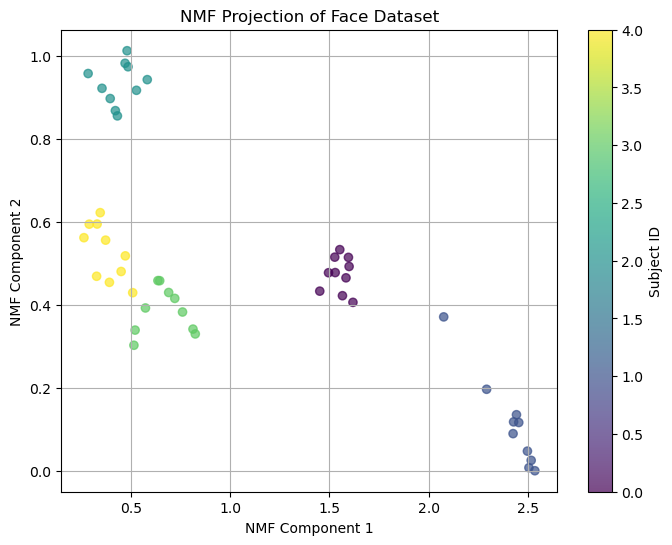

In [5]:
'''
https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb
plot_digit function (see X_normalized variable)
'''
X_scaled = MinMaxScaler().fit_transform(X)  # Scale the data to [0, 1] range for NMF

# TODO: Apply NMF to the 5-subject face subset (X,y)
'''
https://www.geeksforgeeks.org/machine-learning/handling-missing-values-in-non-negative-matrix-factorization-nmf/
Section 4. Matrix Factorization Imputation

Also used official Scikit-learn documentation for NMF:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
'''
nmf = NMF(n_components=2, init='nndsvda', random_state=42, max_iter = 1000)
X_nmf = nmf.fit_transform(X_scaled)

# TODO: Create scatter plot for NMF
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")
plt.title("NMF Projection of Face Dataset")
plt.colorbar(scatter, label="Subject ID")
plt.grid()
plt.show()